In [1]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np

In [2]:
movielens_hr = pd.read_csv('movielens_hr.csv')
movielens_ndcg = pd.read_csv('movielens_ndcg.csv')

pinterest_hr = pd.read_csv('pinterest_hr.csv')
pinterest_ndcg = pd.read_csv('pinterest_ndcg.csv')

data = [movielens_hr, movielens_ndcg, pinterest_hr, pinterest_ndcg]

In [3]:
models = ['Dot Product (MF)', 'Learned Similarity (MLP)', 'MLP+GMF (NeuMF)', 'MLP+GMF pretrained (NeuMF)']
colors = ['C0', 'C1', 'C2', 'C3']

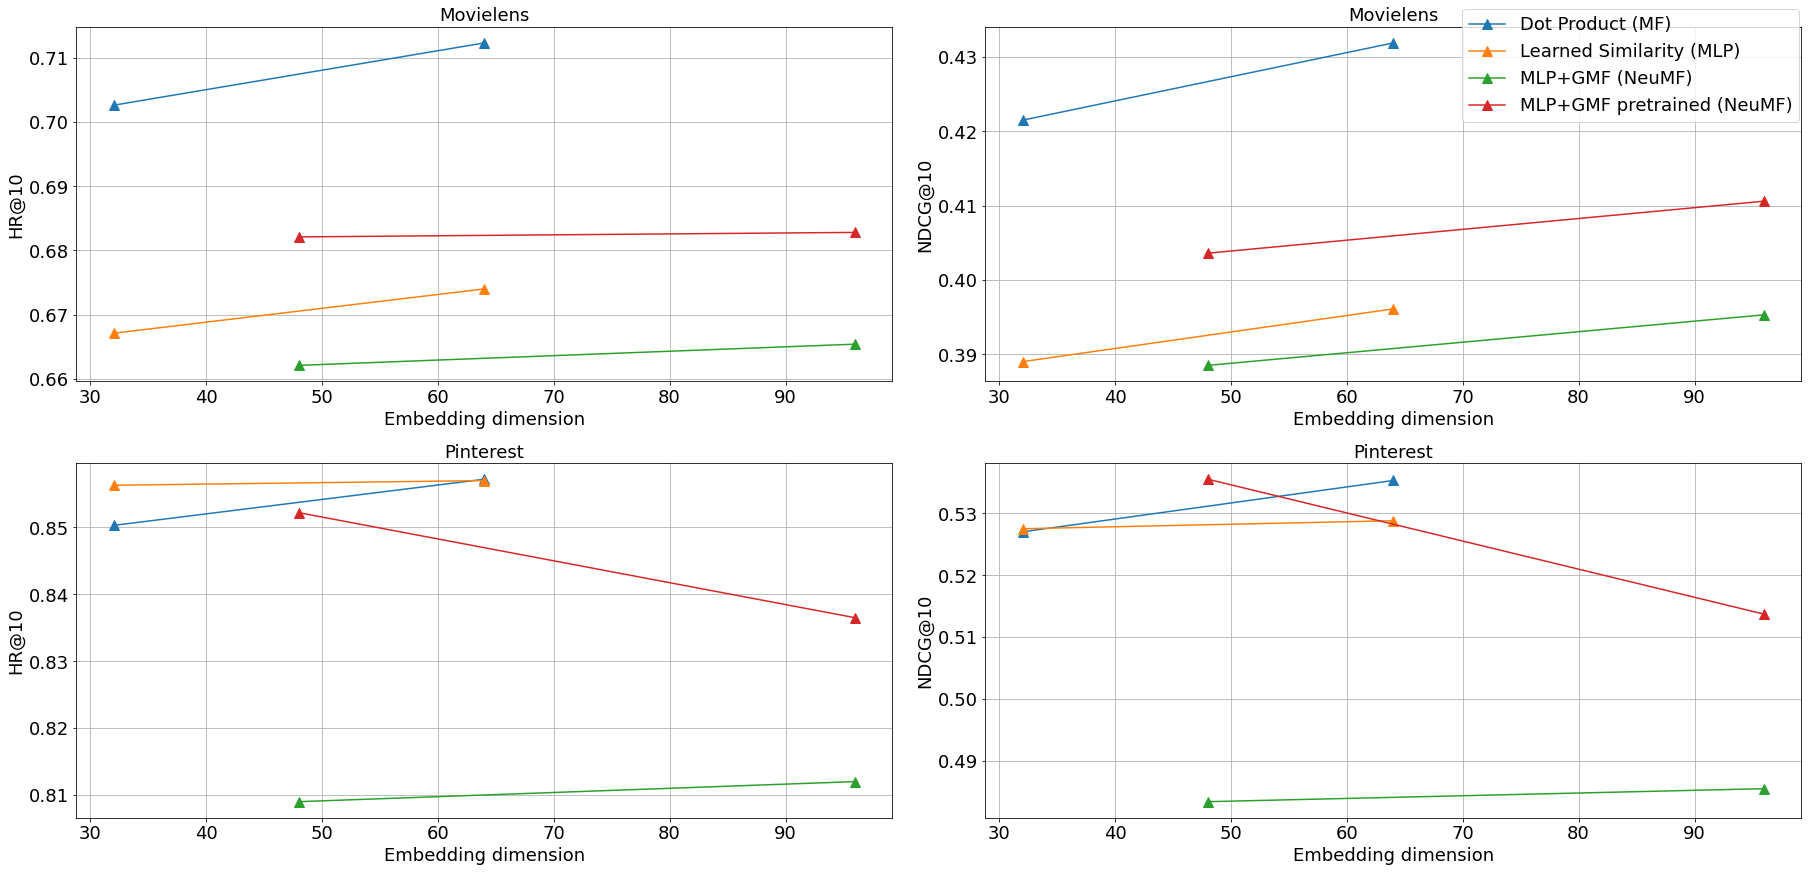

In [4]:
fig = plt.figure(constrained_layout=True, figsize=(25, 12))
plt.style.use('default')
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
exps = []

for k in range(4):
    exp = fig.add_subplot(spec[k // 2, k % 2])
    
    if k < 2:
        exp.set_title(f'Movielens', fontsize=18)
    else:
        exp.set_title(f'Pinterest', fontsize=18)
    
    for i, column in enumerate(data[k].columns):
        x_coords = [48, 96] if column.startswith('ncf') else [32, 64]
        exp.plot(x_coords, data[k][column].to_numpy(), marker="^", ms=10, label=models[i], c = colors[i])

    exp.set_xlabel('Embedding dimension', fontsize=18)
    
    if k % 2:
        exp.set_ylabel('NDCG@10', fontsize=18)
    else:
        exp.set_ylabel('HR@10', fontsize=18)
        
    plt.tick_params(labelsize=18)
    
    exps.append(exp)
    
for mg in exps:
    mg.grid()
    
handles, labels = exps[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=18)#, ncol=4)
plt.show()